In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
import category_encoders as ce
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectFromModel
from scipy.stats import randint


In [3]:
df=pd.read_csv("ml_data.csv")

In [4]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,day of reservation,month of reservation,year of reservation
0,INN00001,2.0,0.0,2.0,5.0,Meal Plan 1,0.0,Room_Type 1,224.0,Offline,0.0,0.0,0.0,88.00,0.0,2015-10-02,Not_Canceled,2,10,2015
1,INN00002,2.0,0.0,1.0,3.0,Not Selected,0.0,Room_Type 1,5.0,Online,0.0,0.0,0.0,106.68,1.0,2018-11-06,Not_Canceled,6,11,2018
2,INN00003,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,1.0,Online,0.0,0.0,0.0,50.00,0.0,2018-02-28,Canceled,28,2,2018
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,Online,0.0,0.0,0.0,100.00,1.0,2017-05-20,Canceled,20,5,2017
4,INN00005,2.0,0.0,1.0,2.0,Not Selected,0.0,Room_Type 1,48.0,Online,0.0,0.0,0.0,77.00,0.0,2018-04-11,Canceled,11,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36059,INN36282,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,57.0,Online,0.0,0.0,0.0,115.00,1.0,2018-09-13,Canceled,13,9,2018
36060,INN36283,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,34.0,Online,0.0,0.0,0.0,107.55,1.0,2017-10-15,Not_Canceled,15,10,2017
36061,INN36284,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 4,83.0,Online,0.0,0.0,0.0,105.61,1.0,2018-12-26,Not_Canceled,26,12,2018
36062,INN36285,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,121.0,Offline,0.0,0.0,0.0,96.90,1.0,2018-07-06,Not_Canceled,6,7,2018


## Data preprocessing

In [5]:
# Separate features and target variable
X=df.drop(["booking status","Booking_ID","date of reservation"],axis=1)
y=df["booking status"]


# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [7]:
np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test)

((38795, 17), (9699, 17), (38795,), (9699,))

In [8]:
#map Room type because ordinal here are impotrant
data={
    'Room_Type 1'  : 1,
    'Room_Type 2'  : 2,
    'Room_Type 4'  : 3,
    'Room_Type 5'  : 4,
    'Room_Type 6'  : 5,
    'Room_Type 7'  : 6,
    
}
X_train.replace(data,inplace=True)
X_test.replace(data,inplace=True)

In [9]:
#map type of meal because ordinal here are impotrant
data={
    'Meal Plan 1'  : 1,
    'Meal Plan 2'  : 2,
    'Not Selected'  : 0,

}
X_train.replace(data,inplace=True)
X_test.replace(data,inplace=True)

In [10]:
#onehot encoding
encoder=ce.OneHotEncoder(cols=["market segment type"])
encoding_x_train=encoder.fit_transform(X_train)
encoding_x_test=encoder.transform(X_test)

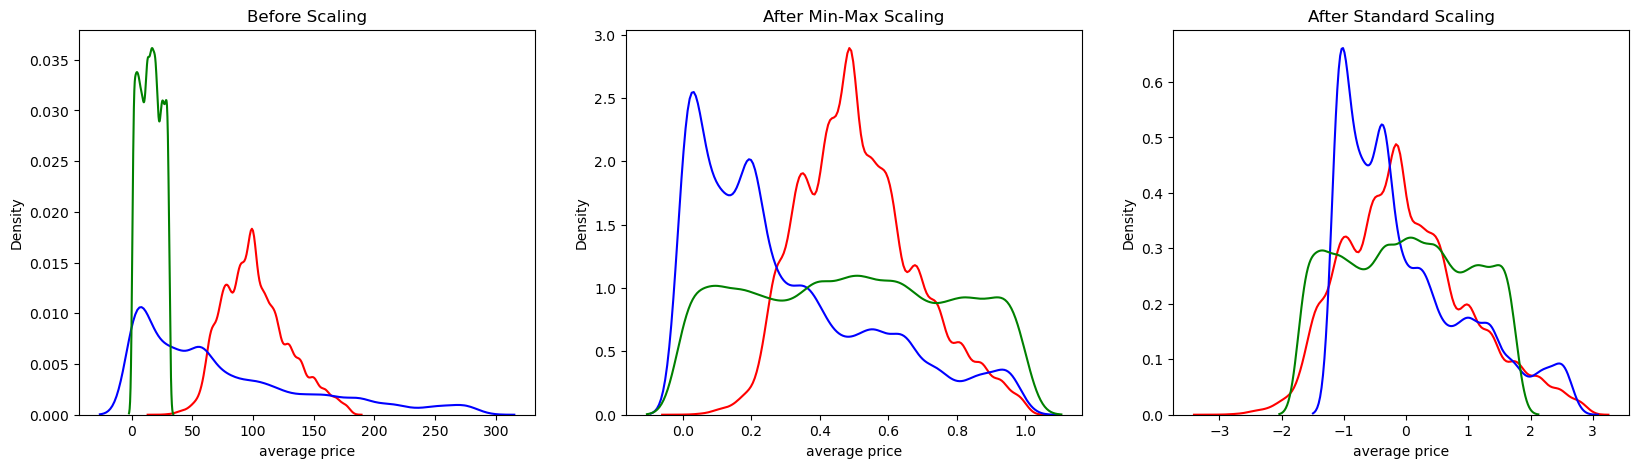

In [11]:
#this plot to show best scaler should we chose
scaler = StandardScaler()
standard_df = scaler.fit_transform(encoding_x_train[["average price","lead time","day of reservation"]])
standard_df = pd.DataFrame(standard_df, columns =["average price","lead time","day of reservation"])
 
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(encoding_x_train[["average price","lead time","day of reservation"]])
minmax_df = pd.DataFrame(minmax_df, columns =["average price","lead time","day of reservation"])
 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
sns.kdeplot(X['average price'],ax=ax1,color='r')
sns.kdeplot(X['lead time'],ax=ax1,color='b')
sns.kdeplot(X['day of reservation'],ax=ax1,color='g')

ax1.set_title('Before Scaling') 

sns.kdeplot(minmax_df['average price'], ax = ax2, color ='red')
sns.kdeplot(minmax_df['lead time'], ax = ax2, color ='blue')
sns.kdeplot(minmax_df['day of reservation'], ax = ax2, color ='g')

ax2.set_title('After Min-Max Scaling')
 
sns.kdeplot(standard_df['average price'], ax = ax3, color ='red')
sns.kdeplot(standard_df['lead time'], ax = ax3, color ='blue')
sns.kdeplot(standard_df['day of reservation'], ax = ax3, color ='g')


ax3.set_title('After Standard Scaling')


 
plt.show()

<code style="color: green;">from figure, The Standard Scaler has proven to be the most suitable option, and as such, I have decided to implement it.
</code><br>

In [12]:
#sacle x_train data
scaler = StandardScaler()

scaling = scaler.fit_transform(encoding_x_train)
train_data = pd.DataFrame(scaling, columns =encoding_x_train.columns)#convert to data frame

In [13]:
#sacle x_test data

scaling0 = scaler.transform(encoding_x_test)
test_data = pd.DataFrame(scaling0, columns =encoding_x_test.columns)#convert to data frame

### MODELS

In [14]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()

In [19]:
models = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("SVM", svm),
    ("KNN", knn)
]

for model_name, model in models:
    model.fit(train_data, y_train)
    train_accuracy = model.score(train_data, y_train)
    print(f"Model: {model_name}, Train Accuracy: {train_accuracy:.4f}")

    y_pred = model.predict(test_data)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("---------------------------------------------------------")

Model: Logistic Regression, Train Accuracy: 0.7417
Accuracy: 0.7405
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.74      0.74      0.74      4778
Not_Canceled       0.75      0.74      0.74      4921

    accuracy                           0.74      9699
   macro avg       0.74      0.74      0.74      9699
weighted avg       0.74      0.74      0.74      9699

Confusion Matrix:
[[3530 1248]
 [1269 3652]]
---------------------------------------------------------
Model: Decision Tree, Train Accuracy: 0.9927
Accuracy: 0.9103
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.94      0.91      4778
Not_Canceled       0.94      0.88      0.91      4921

    accuracy                           0.91      9699
   macro avg       0.91      0.91      0.91      9699
weighted avg       0.91      0.91      0.91      9699

Confusion Matrix:
[[4510  268]
 [ 602 4319]]
----------------------

In [22]:
def select_features(model, num):
    seq_model = sfs(model,
                    k_features=num,
                    forward=False,
                    cv=5,
                    scoring='f1',
                    n_jobs=-1)
    
    seq_model.fit(train_data, y_train)
    feat_names = list(seq_model.k_feature_names_)  # Access the selected feature names
    print(f"Selected Features: {feat_names}")    
    model.fit(train_data[feat_names], y_train)  # Fit model on selected features
    
    train_accuracy = model.score(train_data[feat_names], y_train)
    print(f"Train Accuracy: {train_accuracy:.4f}")

    y_pred = model.predict(test_data[feat_names])

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification report
    class_report = classification_report(y_test, y_pred,zero_division=0)
    print("Classification Report:")
    print(class_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)


In [18]:
select_features(random_forest,12)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9311
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4555  223]
 [ 445 4476]]


In [19]:
select_features(random_forest,11)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9306
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4551  227]
 [ 446 4475]]


In [20]:
select_features(random_forest,10)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9318
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4558  220]
 [ 441 4480]]


In [21]:
select_features(random_forest,9)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9327
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4553  225]
 [ 428 4493]]


In [23]:
select_features(random_forest,8) 

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9318
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4556  222]
 [ 439 4482]]


In [24]:
select_features(random_forest,7) 

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Train Accuracy: 0.9927
Accuracy: 0.9315
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4557  221]
 [ 443 4478]]


In [30]:
select_features(random_forest,5) 

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.9927
Accuracy: 0.9321
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      4778
Not_Canceled       0.95      0.91      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4554  224]
 [ 435 4486]]


In [29]:
select_features(log_reg,8)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.7417
Accuracy: 0.7405
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.74      0.74      0.74      4778
Not_Canceled       0.75      0.74      0.74      4921

    accuracy                           0.74      9699
   macro avg       0.74      0.74      0.74      9699
weighted avg       0.74      0.74      0.74      9699

Confusion Matrix:
[[3530 1248]
 [1269 3652]]


In [23]:
select_features(log_reg,5)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.7417
Accuracy: 0.7405
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.74      0.74      0.74      4778
Not_Canceled       0.75      0.74      0.74      4921

    accuracy                           0.74      9699
   macro avg       0.74      0.74      0.74      9699
weighted avg       0.74      0.74      0.74      9699

Confusion Matrix:
[[3530 1248]
 [1269 3652]]


In [24]:
select_features(svm,5)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.8075
Accuracy: 0.8016
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.79      0.82      0.80      4778
Not_Canceled       0.81      0.79      0.80      4921

    accuracy                           0.80      9699
   macro avg       0.80      0.80      0.80      9699
weighted avg       0.80      0.80      0.80      9699

Confusion Matrix:
[[3896  882]
 [1042 3879]]


In [25]:
select_features(knn,5)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.8960
Accuracy: 0.8475
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.82      0.89      0.85      4778
Not_Canceled       0.88      0.81      0.84      4921

    accuracy                           0.85      9699
   macro avg       0.85      0.85      0.85      9699
weighted avg       0.85      0.85      0.85      9699

Confusion Matrix:
[[4256  522]
 [ 957 3964]]


In [28]:
select_features(knn,7)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.8960
Accuracy: 0.8475
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.82      0.89      0.85      4778
Not_Canceled       0.88      0.81      0.84      4921

    accuracy                           0.85      9699
   macro avg       0.85      0.85      0.85      9699
weighted avg       0.85      0.85      0.85      9699

Confusion Matrix:
[[4256  522]
 [ 957 3964]]


In [26]:
select_features(decision_tree,5)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.9927
Accuracy: 0.9098
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.94      0.91      4778
Not_Canceled       0.94      0.88      0.91      4921

    accuracy                           0.91      9699
   macro avg       0.91      0.91      0.91      9699
weighted avg       0.91      0.91      0.91      9699

Confusion Matrix:
[[4505  273]
 [ 602 4319]]


In [27]:
select_features(decision_tree,7)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^^

Selected Features: ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type_1', 'market segment type_2', 'market segment type_3', 'market segment type_4', 'market segment type_5', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'day of reservation', 'month of reservation', 'year of reservation']
Train Accuracy: 0.9927
Accuracy: 0.9114
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.95      0.91      4778
Not_Canceled       0.94      0.88      0.91      4921

    accuracy                           0.91      9699
   macro avg       0.91      0.91      0.91      9699
weighted avg       0.91      0.91      0.91      9699

Confusion Matrix:
[[4521  257]
 [ 602 4319]]


In [36]:
# Feature selection based on importance
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(random_forest)
selector.fit(train_data, y_train)
X_train_selected = selector.transform(train_data)
X_test_selected = selector.transform(test_data)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10 , 100 , 150 , 200 , 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1"
                          )
grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


D:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.82      0.81      0.82      4778
Not_Canceled       0.82      0.83      0.83      4921

    accuracy                           0.82      9699
   macro avg       0.82      0.82      0.82      9699
weighted avg       0.82      0.82      0.82      9699

Confusion Matrix:
[[3891  887]
 [ 832 4089]]


In [37]:
# Feature selection based on importance
decision_tree = DecisionTreeClassifier( random_state=42)
selector = SelectFromModel(decision_tree)
selector.fit(train_data, y_train)
X_train_selected = selector.transform(train_data)
X_test_selected = selector.transform(test_data)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dr = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dr,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1"
                          )
grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_dr = grid_search.best_estimator_
best_dr.fit(X_train_selected, y_train)
y_pred = best_dr.predict(X_test_selected)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


D:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.83      0.83      0.83      4778
Not_Canceled       0.83      0.84      0.83      4921

    accuracy                           0.83      9699
   macro avg       0.83      0.83      0.83      9699
weighted avg       0.83      0.83      0.83      9699

Confusion Matrix:
[[3952  826]
 [ 809 4112]]


In [38]:
# Feature selection based on L1 regularization (Logistic Regression)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = SelectFromModel(log_reg)
selector.fit(train_data, y_train)
X_train_selected = selector.transform(train_data)
X_test_selected = selector.transform(test_data)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
grid_search = GridSearchCV(lr,
                           param_grid,
                           cv=5,
                           n_jobs=-1
                          )
grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_lr = grid_search.best_estimator_
best_lr.fit(X_train_selected, y_train)
y_pred = best_lr.predict(X_test_selected)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'C': 0.1, 'max_iter': 100}
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.74      0.74      0.74      4778
Not_Canceled       0.75      0.74      0.74      4921

    accuracy                           0.74      9699
   macro avg       0.74      0.74      0.74      9699
weighted avg       0.74      0.74      0.74      9699

Confusion Matrix:
[[3533 1245]
 [1268 3653]]


In [40]:
# Feature selection based on L1 regularization (Logistic Regression)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = SelectFromModel(log_reg)
selector.fit(train_data, y_train)
X_train_selected = selector.transform(train_data)
X_test_selected = selector.transform(test_data)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'C': [0.1, 1.0, 10.0],  # Log-uniform distribution for C
    'max_iter': [100, 200, 300, 400],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'tol': [1e-3, 1e-4, 1e-5],
}

lr = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(lr,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the model with best parameters
best_lr = random_search.best_estimator_
best_lr.fit(X_train_selected, y_train)
y_pred = best_lr.predict(X_test_selected)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 0.1}
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.74      0.74      0.74      4778
Not_Canceled       0.75      0.74      0.74      4921

    accuracy                           0.74      9699
   macro avg       0.74      0.74      0.74      9699
weighted avg       0.74      0.74      0.74      9699

Confusion Matrix:
[[3533 1245]
 [1268 3653]]


In [39]:
# Feature selection based on importance using Random Forest
rf = RandomForestClassifier(random_state=42)
selector = SelectFromModel(rf)
selector.fit(train_data, y_train)
X_train_selected = selector.transform(train_data)
X_test_selected = selector.transform(test_data)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the model with best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'bootstrap': False, 'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.92      0.94      0.93      4778
Not_Canceled       0.94      0.92      0.93      4921

    accuracy                           0.93      9699
   macro avg       0.93      0.93      0.93      9699
weighted avg       0.93      0.93      0.93      9699

Confusion Matrix:
[[4471  307]
 [ 410 4511]]


In [41]:
# Get the boolean mask of selected features
selected_mask = selector.get_support()

# Get the names of the selected features (assuming 'train_data' is a DataFrame)
selected_feature_names = train_data.columns[selected_mask]

# Or get the indices of the selected features
selected_feature_indices = [i for i, selected in enumerate(selected_mask) if selected]

# Print or use the selected feature names or indices
print("Selected Feature Names:", selected_feature_names)
print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Names: Index(['number of week nights', 'lead time', 'average price',
       'special requests', 'day of reservation', 'month of reservation'],
      dtype='object')
Selected Feature Indices: [3, 7, 16, 17, 18, 19]
